# Guided Project: Visualizing the gender gap in college degrees

**This project will examine the gender gap across different college degrees in the US during the period 1970-2012**. The [data](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv) was originally pusblished by [The Department of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) and has been cleaned and republished by data scientist Randal Olson.

**The gender gap is the difference between the percentage of men and the percentage of women who enroll on a degree**. I will show the gender gap evolution between 1970 and 2012 for each degree.

I will use the **pandas** library to explore and organize the data, the **matplotlib** library to build the graphics,  and the [Color blind 10 palette from Tableau](http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) for graphic colors.

## Gender gap in STEM degrees

I will first explore the gender gap among [STEM](https://en.wikipedia.org/wiki/Science,_technology,_engineering,_and_mathematics) degrees.

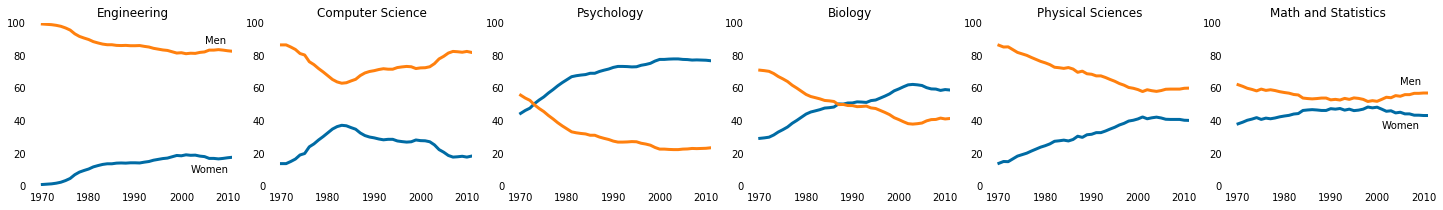

In [10]:
# Run Jupyter magic so that plots are displayed inline
%matplotlib inline  

# Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read csv into a dataframe, define line colors (for the graphics) and STEM categories
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

# Create graphics figure
fig = plt.figure(figsize=(25, 3))

# Build a graphic for each STEM category
for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    
    # Define and plot the column representing the percentage of men enrolling on a degree each year
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    
    # Remove axes lines for the sake of clarity
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    
    # Standardize x and y limits across all graphics
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    
    # Remove all ticks for the sake of clarity
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    # Attach legend to lines of first and last graphic
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

# Print the graphics        
plt.show()

There are 3 categories with a big gender gap: ***Engineering* and *Computer science* are men-dominated while *Psychology* has been dominated by women for the last 20+ years**.

There are other 3 categories that have a minor gap: *Biology*, *Physical sciences*, and *Math and statistics*. The gap in all three categories has steadily decreased in the last 40 years. In the case of Biology the gap even reverted and it is now a women-dominated field.

## Improving graphic aesthetics

I will next refine the graphic aesthetics to improve clarity and make them more appealing. This time, all 17 degrees will be included in the analysis.

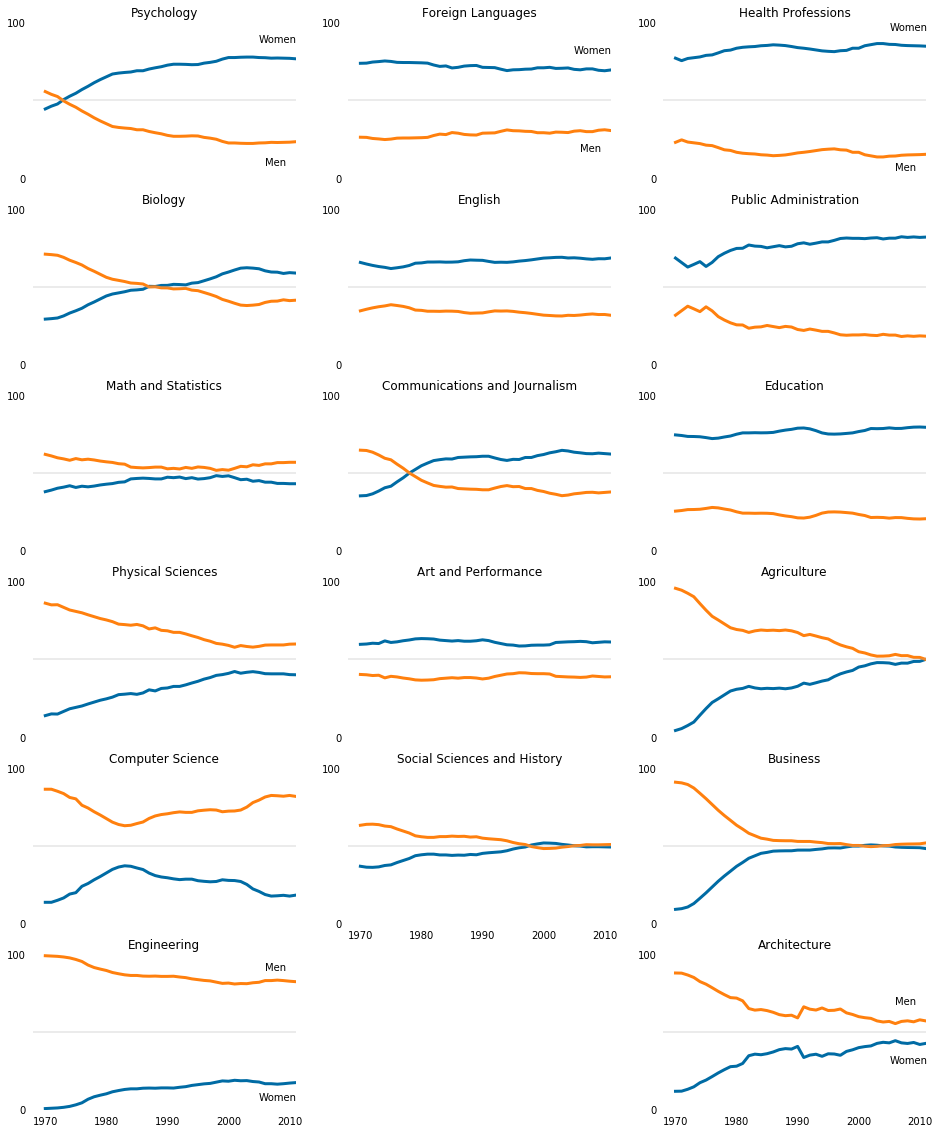

In [14]:
# Define 3 different groups of degrees
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig = plt.figure(figsize=(16, 20))

# Create a graphic for each degree in the STEM group and locate them in the first column
for sp in range(0,18,3):
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[int((sp-(sp/3*2)))]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[int((sp-(sp/3*2)))]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[int((sp-(sp/3*2)))])
    
    # Remove all ticks and also the x-axis labels
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    # Remove all but the first and last y-axis labels to declutter and improve readability
    ax.set_yticks([0,100])
    
    # Include a light grey horizontal line in each graphic to visualize the gender parity level
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if sp == 0:
        ax.text(2005, 87, 'Women')
        ax.text(2006, 8, 'Men')
    elif sp == 15:
        ax.text(2006, 90, 'Men')
        ax.text(2005, 6, 'Women')
        
        # Add the x-axis labels in the last graphic of the column
        ax.tick_params(labelbottom=True)

# Create a graphic for each degree in the liberal arts group and locate them in the second column
for sp in range(0,15,3):
    ax = fig.add_subplot(6,3,sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[int((sp-(sp/3*2)))]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[int((sp-(sp/3*2)))]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[int((sp-(sp/3*2)))])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

    if sp == 0:
        ax.text(2005, 80, 'Women')
        ax.text(2006, 17, 'Men')

    elif sp == 12:
        ax.tick_params(labelbottom=True)

# Create a graphic for each degree in the Other group and locate them in the third column
for sp in range(0,18,3):
    ax = fig.add_subplot(6,3,sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[int((sp-(sp/3*2)))]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[int((sp-(sp/3*2)))]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[int((sp-(sp/3*2)))])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)

    if sp == 0:
        ax.text(2005, 95, 'Women')
        ax.text(2006, 5, 'Men')

    elif sp == 15:
        ax.text(2006, 68, 'Men')
        ax.text(2005, 30, 'Women')
        ax.tick_params(labelbottom=True)

# Save a png image featuring all 17 graphics
plt.savefig('gender_degrees.png')







In the **liberal arts** group, all but one degree are **dominated by women in a rough ratio of 60% to 40%**. *Social sciences and history* enjoys perfect parity and is hence the exception.

In the Other group, half the degrees are **overwhelmly feminine (Health professions, Public administration, Education)** whereas the other half have converged into parity (*Agriculture*, *Business*) or near parity (*Architecture*) over the last decades.